In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from analysis_lib import *

# kBioReg vs Prosite Scanner

In [9]:
benchmark_df = pd.read_csv("/Users/rschwab/repos/kBioReg/data/RESULTS/pdb_alphamods_results.csv")

In [6]:
benchmark_df["TOTAL"] = pd.Series(benchmark_df.LOAD+benchmark_df.SEARCH)

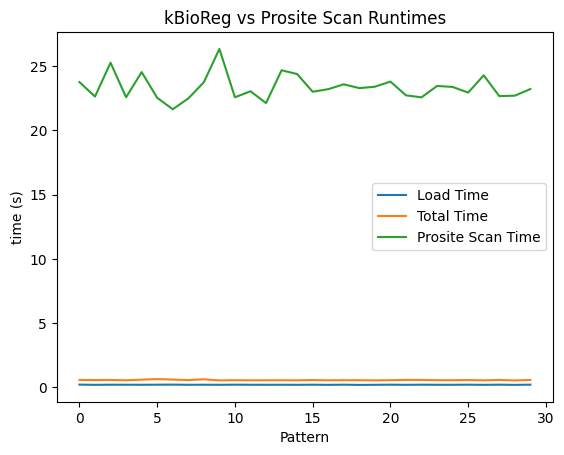

In [10]:
plt.title("kBioReg vs Prosite Scan Runtimes")

plt.plot(range(30), benchmark_df.LOAD, label="Load Time")
plt.plot(range(30), benchmark_df.TOTAL, label="Total Time")
plt.plot(range(30), benchmark_df.PS_SCAN, label="Prosite Scan Time")

plt.xlabel('Pattern')
plt.ylabel('time (s)')
plt.legend()
plt.savefig("pdb_scan.png")
plt.show()

# Multithreading Comparison

In [52]:
t1 = pd.read_csv("/Users/rschwab/repos/kBioReg/data/RESULTS/simple_queries_benchmarks_t1.csv")
t2 = pd.read_csv("/Users/rschwab/repos/kBioReg/data/RESULTS/simple_queries_benchmarks_t2.csv")
t4 = pd.read_csv("/Users/rschwab/repos/kBioReg/data/RESULTS/simple_queries_benchmarks_t4.csv")
t8 = pd.read_csv("/Users/rschwab/repos/kBioReg/data/RESULTS/simple_queries_benchmarks_t8.csv")
real_ps = pd.read_csv("/Users/rschwab/repos/kBioReg/real_timings.csv")

In [53]:
t1_exec_time = t1.TOTAL-t1.LOAD
t2_exec_time = t2.TOTAL-t2.LOAD
t4_exec_time = t4.TOTAL-t4.LOAD
t8_exec_time = t8.TOTAL-t8.LOAD

In [54]:
exec_df = pd.DataFrame(list(zip(t1_exec_time, t2_exec_time, t4_exec_time, t8_exec_time)))
exec_df.columns = ["T1", "T2", "T4", "T8"]
exec_df["ProSite"] = real_ps.ProSite

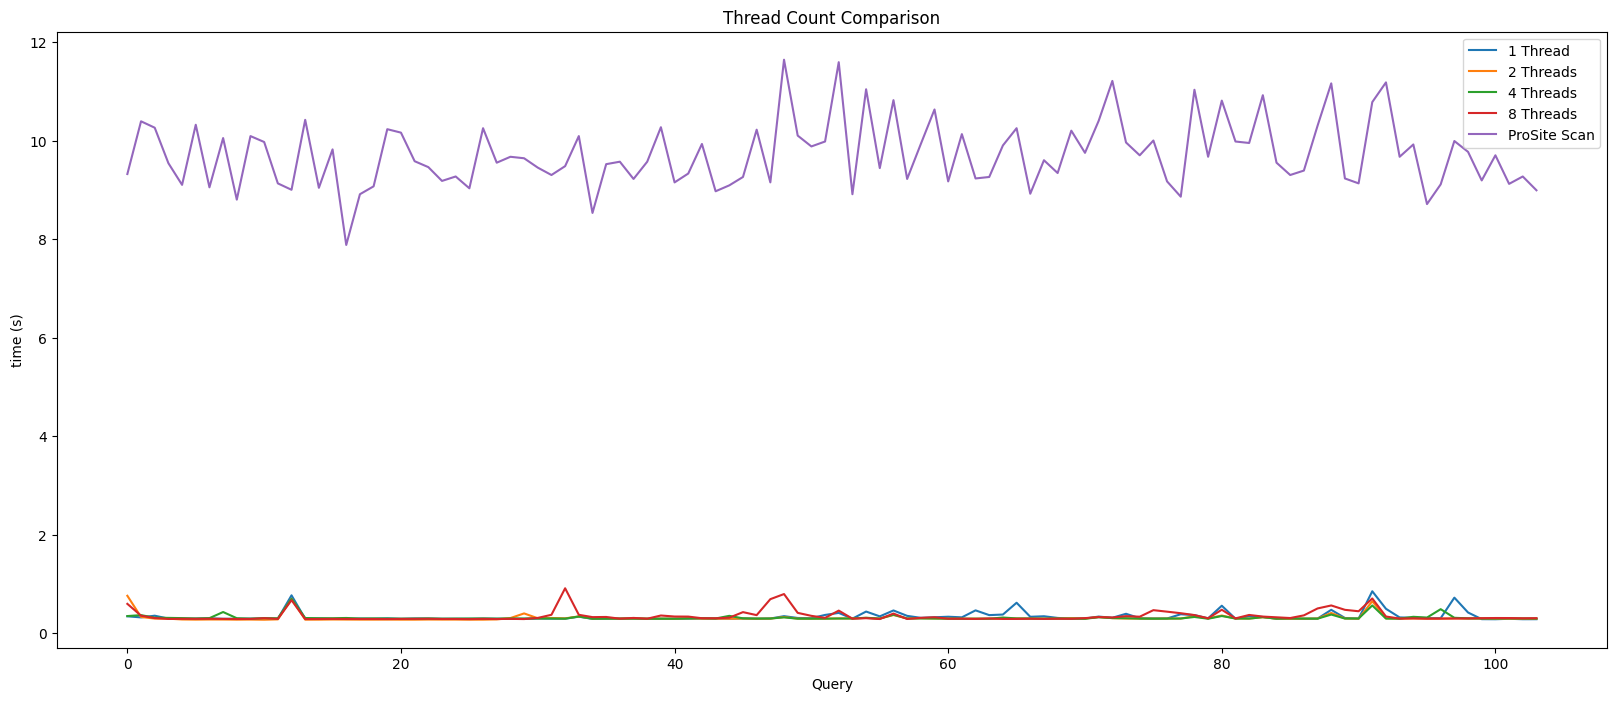

In [67]:
figure(figsize=(20,8))
plt.title("Thread Count Comparison")

plt.plot(range(104), exec_df.T1, label="1 Thread")
plt.plot(range(104), exec_df.T2, label="2 Threads")
plt.plot(range(104), exec_df.T4, label="4 Threads")
plt.plot(range(104), exec_df.T8, label="8 Threads")
plt.plot(range(104), exec_df.ProSite, label="ProSite Scan")

plt.xlabel('Query')
plt.ylabel('time (s)')
plt.legend()

# Swiss Prot Record Size Distributions

In [88]:
uniprot = pysam.FastaFile("/Users/rschwab/repos/kBioReg/data/REFERENCES/uniprot_sprot.fasta")

In [89]:
record_length_series = pd.Series(uniprot.lengths)
record_length_series.describe()

count    568744.000000
mean        361.406919
std         340.146814
min           2.000000
25%         169.000000
50%         295.000000
75%         449.000000
max       35213.000000
dtype: float64

<Axes: ylabel='Frequency'>

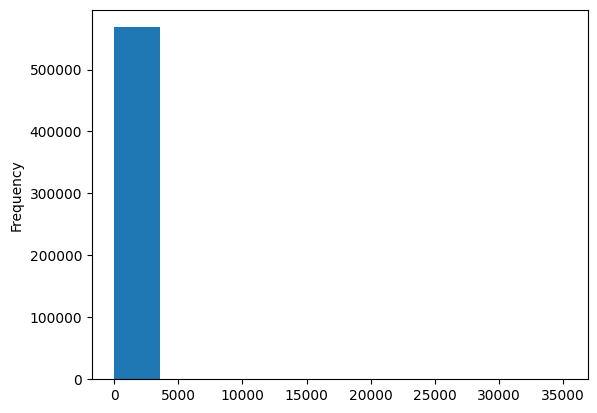

In [90]:
record_length_series.plot.hist()

# 

# Experimenting with DGrams

## Using a small, one-record FASTA File

In [5]:
dists = track_fasta("/Users/rschwab/repos/kBioReg/data/REFERENCES/aa_example.fna")

In [6]:
sum(dists)

494

## Using the whole SwissProt DB

In [7]:
dists = track_fasta("/Users/rschwab/repos/kBioReg/data/REFERENCES/uniprot_sprot.fasta")

In [8]:
sum(dists) # 3,756,722,694

3756722694

In [10]:
3756722694/1024

3668674.505859375

# Prosite vs csearch vs IBF vs HIBF

In [12]:
times_df = pd.read_csv("/Users/rschwab/repos/TetRex/data/RESULTS/simple_timings_fair.tsv", sep="\t")

In [13]:
times_df

,NAME,ID,PATTERN,GROUP_COUNT,REGEX,PROSITE_TIME,CSEARCH_TIME,TETREX_IBF,TETREX_HIBF
0,ANTENNAPEDIA,PS00032,[LIVMFE]-[FY]-P-W-M-[KRQTA],5,(L|I|V|M|F|E)(F|Y)PWM(K|R|Q|T|A),10.686,0.208119,0.009352,0.074809
1,ENGRAILED,PS00033,L-M-A-[EQ]-G-L-Y-N,7,LMA(E|Q)GLYN,10.512,0.430810,0.001576,0.001713
2,DNA_MISMATCH_REPAIR_1,PS00058,G-F-R-G-E-[AG]-L,6,GFRGE(A|G)L,10.902,0.430812,0.028046,0.003708
3,L_LDH,PS00064,[LIVMA]-G-[EQ]-H-G-[DN]-[ST],6,(L|I|V|M|A)G(E|Q)HG(D|N)(S|T),10.712,0.430432,0.006144,0.002450
4,G6P_DEHYDROGENASE,PS00069,D-H-[YF]-L-G-K-[EQK],6,DH(Y|F)LGK(E|Q|K),9.343,0.421385,0.002936,0.001794
...,...,...,...,...,...,...,...,...,...
112,COE,PS01345,C-S-R-C-C-[DE]-[KR]-K-S-C,9,CSRCC(D|E)(K|R)KSC,9.409,0.291799,0.004174,0.001186
113,NODA,PS01349,[RHQ]-[ST]-W-[GSA]-G-A-R-P-E,8,(R|H|Q)(S|T)W(G|S|A)GARPE,10.440,0.441299,0.001652,0.001152
114,PHOSPHOKETOLASE_1,PS60002,E-G-G-E-L-G-Y,6,EGGELGY,9.395,0.475324,0.004374,0.001588
115,CYCLOTIDE_MOEBIUS,PS60009,C-[GA]-E-[ST]-C-[FTV]-[GLTI]-G-[TSK]-C,9,C(G|A)E(S|T)C(F|T|V)(G|L|T|I)G(T|S|K)C,9.621,0.468257,0.006375,0.004876


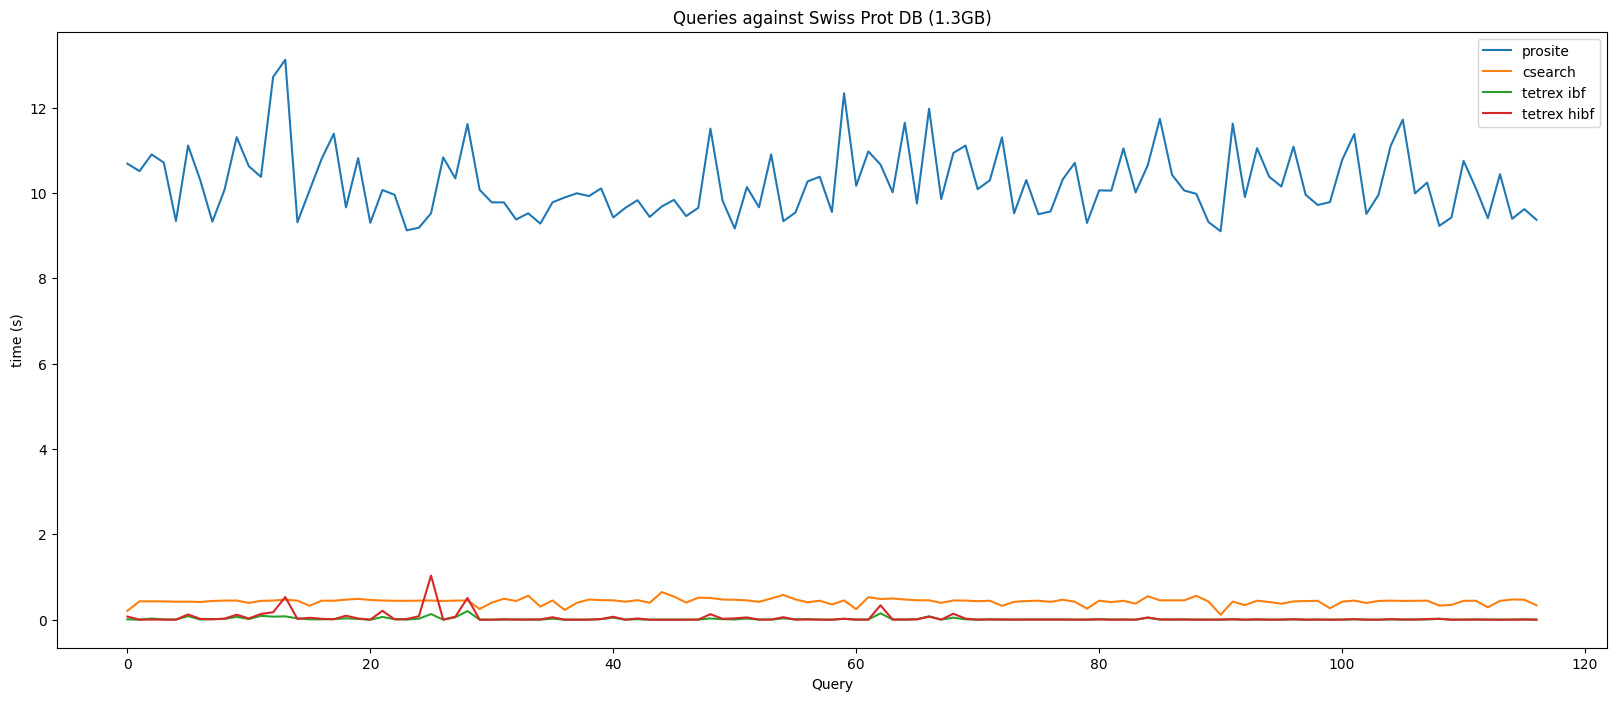

In [6]:
figure(figsize=(20,8))
plt.title("Queries against Swiss Prot DB (1.3GB)")

plt.plot(range(117), times_df.PROSITE_TIME , label="prosite")
plt.plot(range(117), times_df.CSEARCH_TIME, label="csearch")
plt.plot(range(117), times_df.TETREX_IBF, label="tetrex ibf")
plt.plot(range(117), times_df.TETREX_HIBF, label="tetrex hibf")

plt.xlabel('Query')
plt.ylabel('time (s)')
plt.legend()

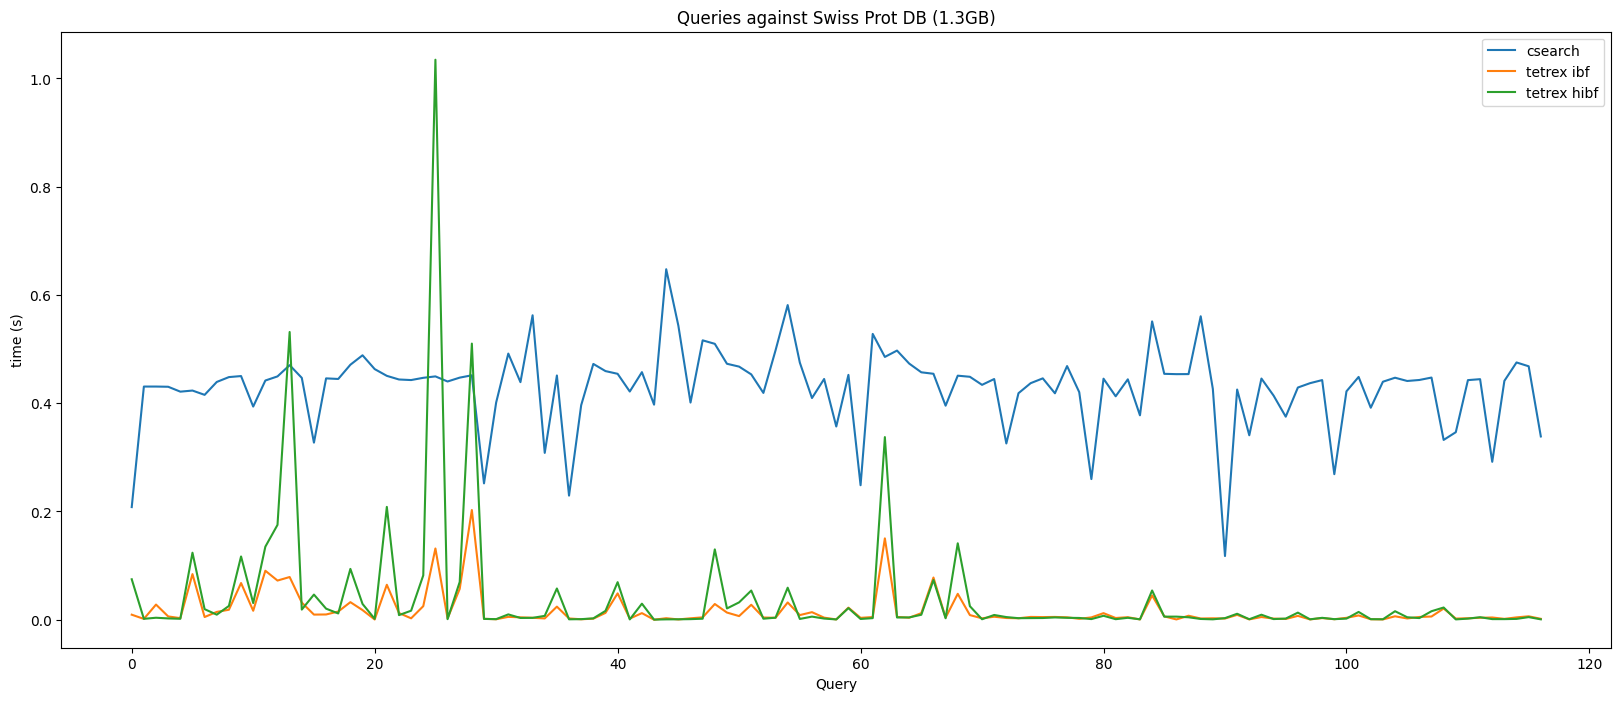

In [7]:
figure(figsize=(20,8))
plt.title("Queries against Swiss Prot DB (1.3GB)")

plt.plot(range(117), times_df.CSEARCH_TIME, label="csearch")
plt.plot(range(117), times_df.TETREX_IBF, label="tetrex ibf")
plt.plot(range(117), times_df.TETREX_HIBF, label="tetrex hibf")

plt.xlabel('Query')
plt.ylabel('time (s)')
plt.legend()

Text(0, 0.5, 'time (s)')

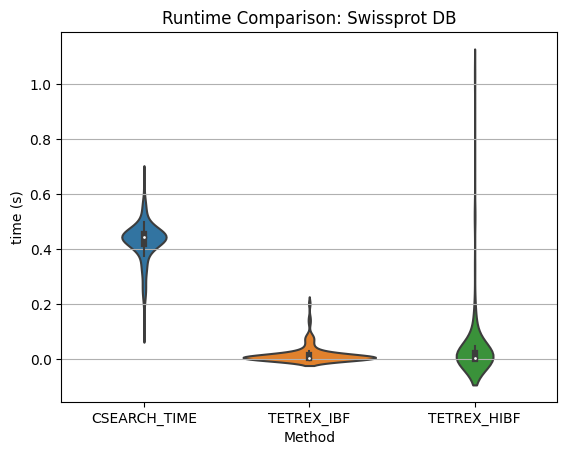

In [8]:
fig, axes = plt.subplots()
sns.violinplot(data=times_df[['CSEARCH_TIME','TETREX_IBF','TETREX_HIBF']], ax = axes)
axes.set_title('Runtime Comparison: Swissprot DB')

axes.yaxis.grid(True)
axes.set_xlabel('Method')
axes.set_ylabel('time (s)')

Text(0, 0.5, 'time (s)')

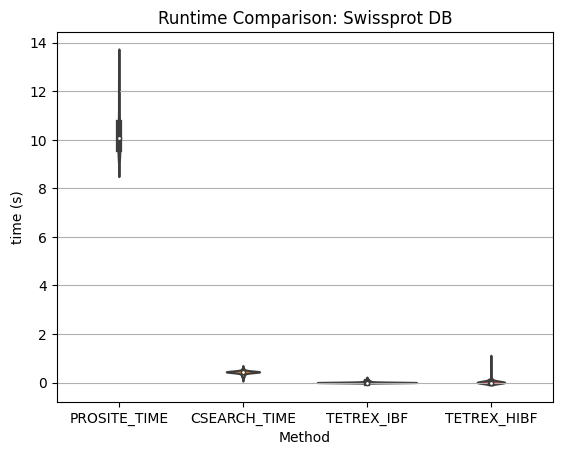

In [9]:
fig, axes = plt.subplots()
sns.violinplot(data=times_df[['PROSITE_TIME','CSEARCH_TIME','TETREX_IBF','TETREX_HIBF']], ax = axes)
axes.set_title('Runtime Comparison: Swissprot DB')

axes.yaxis.grid(True)
axes.set_xlabel('Method')
axes.set_ylabel('time (s)')

<Axes: ylabel='Frequency'>

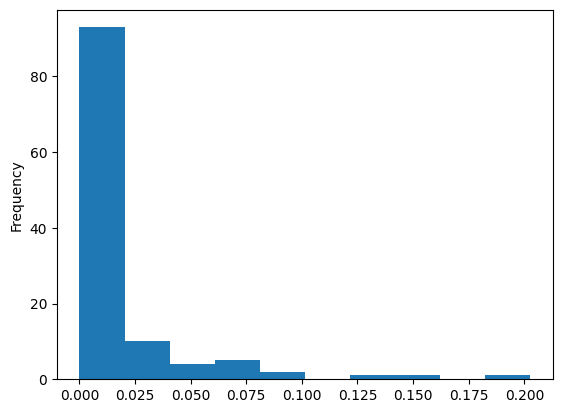

In [51]:
times_df.TETREX_IBF.plot.hist()

<Axes: ylabel='Frequency'>

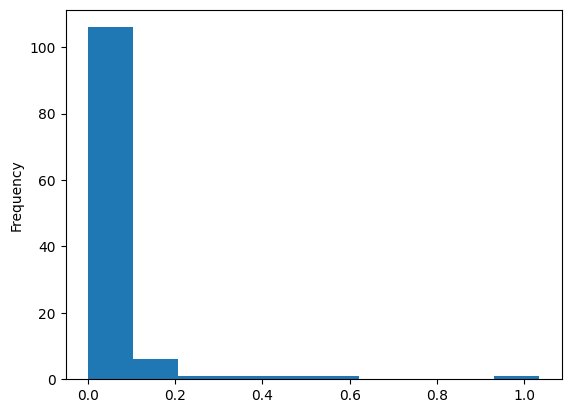

In [52]:
times_df.TETREX_HIBF.plot.hist()

# FP Analysis

## IBF

In [147]:
tetrex_ibf_output = "/Users/rschwab/repos/TetRex/data/RESULTS/fp_analysis/"
tetrex_ibf_results, ibf_true_positives = compare_to_prosite(tetrex_output=tetrex_ibf_output)

In [148]:
ibf_false_positives = [(pred-tp) for pred, tp in zip(tetrex_ibf_results, ibf_true_positives)]

In [149]:
sum(ibf_false_positives)

188

<Axes: ylabel='Frequency'>

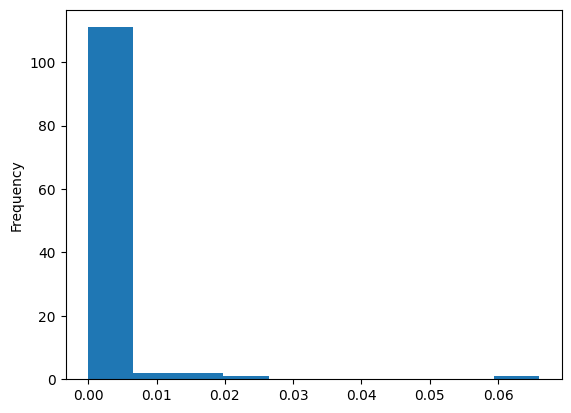

In [150]:
pd.Series([fp/((1024-tp)) for fp,tp in zip(ibf_false_positives, tetrex_ibf_results)]).plot.hist()

<Axes: ylabel='Frequency'>

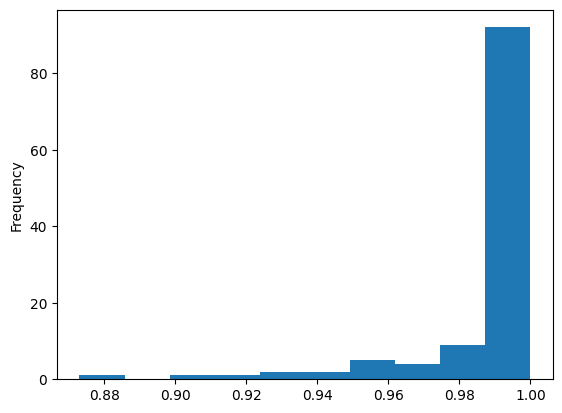

In [163]:
pd.Series([(1024-pred)/1024 for pred in tetrex_ibf_results]).plot.hist()

## HIBF

In [151]:
tetrex_hibf_output = "/Users/rschwab/repos/TetRex/data/RESULTS/fp_analysis_hibf/"
tetrex_hibf_results, hibf_true_positives = compare_to_prosite(tetrex_output=tetrex_hibf_output)

In [161]:
hibf_false_positives = [(pred-tp) for pred, tp in zip(tetrex_hibf_results, hibf_true_positives)]
sum(hibf_false_positives)

2431

In [160]:
# os.listdir(tetrex_hibf_output)[max(range(len(hibf_false_positives)), key=hibf_false_positives.__getitem__)]
max(hibf_false_positives)


748

<Axes: ylabel='Frequency'>

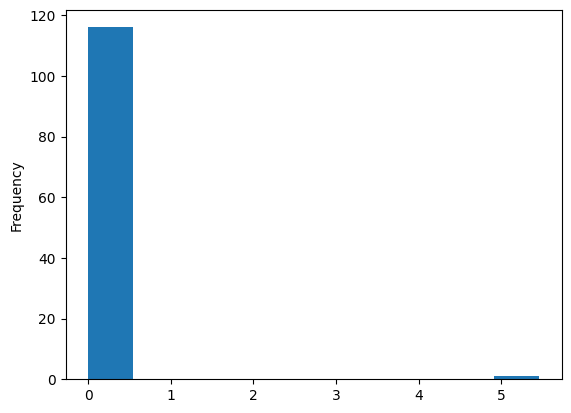

In [132]:
pd.Series([fp/((1024-tp)) for fp,tp in zip(false_positives, tetrex_results)]).plot.hist()

In [166]:
pd.Series([(1024-pred)/1024 for pred in tetrex_hibf_results]).describe()

count    117.000000
mean       0.968399
std        0.090454
min        0.133789
25%        0.977539
50%        0.996094
75%        0.998047
max        1.000000
dtype: float64

# Simulated DNA Benchmarks

In [4]:
info_df = pd.read_csv("/Users/rschwab/Desktop/DNA_Simulated_Benchmarks.csv")

In [5]:
info_df

,RegEx_ID,Tool,QueryTime (s),Bin_Reduction (%),All_Matches_Found
0,1,csearch,24.923215,0.000,True
1,2,csearch,23.527334,0.000,True
2,3,csearch,22.946204,0.000,False
3,4,csearch,23.701144,0.000,False
4,5,csearch,24.264391,0.000,True
5,1,tetrex,0.027397,99.877,True
6,2,tetrex,0.128759,99.877,True
7,3,tetrex,0.306522,99.890,True
8,4,tetrex,0.029880,99.877,True
9,5,tetrex,0.000720,100.000,True


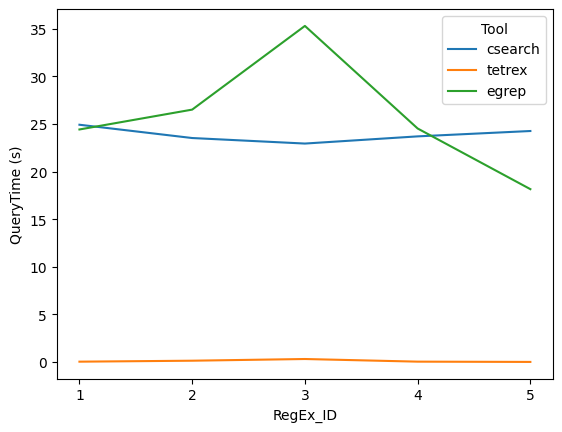

In [13]:
fig, ax = plt.subplots()
sns.lineplot(data=info_df, x="RegEx_ID", y="QueryTime (s)", hue="Tool", ax=ax)
ax.set_xticks(range(1,6))